In [ ]:
# ============================================================================
# Cell 1: Setup and Install Dependencies
# ============================================================================
!pip install -q roboflow ultralytics opencv-python matplotlib numpy

import os
import json
import shutil
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
import numpy as np
from IPython.display import display, Image as IPImage

print("✅ All packages installed!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.8/89.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 53.3 MB/s eta 0:00:00
✅ All packages installed!


In [ ]:
# ============================================================================
# Cell 2: Configure Roboflow API Access
# ============================================================================
from roboflow import Roboflow

# Your credentials
API_KEY = "V74EfwetgJtOmApcRI4g"
WORKSPACE = "intelligent-digital-communications"
PROJECT = "ism-band-results-dataset"

# Initialize Roboflow
rf = Roboflow(api_key=API_KEY)
project = rf.workspace(WORKSPACE).project(PROJECT)

print(f"✅ Connected to Roboflow project: {PROJECT}")
print(f"   Workspace: {WORKSPACE}")


loading Roboflow workspace...
loading Roboflow project...
✅ Connected to Roboflow project: ism-band-results-dataset
   Workspace: intelligent-digital-communications


In [ ]:
# ============================================================================
# Cell 3: Discover Available Dataset Versions
# ============================================================================
# List all available versions
print("🔍 Scanning for available dataset versions...")
available_versions = []

for version_num in range(1, 50):  # Check versions 1-50
    try:
        version = project.version(version_num)
        available_versions.append(version_num)
        print(f"  ✅ Version {version_num} found")
    except:
        continue

print(f"\n📊 Found {len(available_versions)} versions: {available_versions}")
print(f"   Latest version: {max(available_versions)}")

🔍 Scanning for available dataset versions...
  ✅ Version 6 found
  ✅ Version 7 found
  ✅ Version 8 found
  ✅ Version 9 found
  ✅ Version 10 found
  ✅ Version 11 found
  ✅ Version 12 found
  ✅ Version 13 found
  ✅ Version 14 found
  ✅ Version 15 found
  ✅ Version 16 found
  ✅ Version 17 found
  ✅ Version 18 found
  ✅ Version 19 found
  ✅ Version 20 found
  ✅ Version 21 found
  ✅ Version 22 found
  ✅ Version 25 found
  ✅ Version 26 found
  ✅ Version 27 found
  ✅ Version 28 found
  ✅ Version 29 found
  ✅ Version 30 found
  ✅ Version 31 found
  ✅ Version 32 found
  ✅ Version 33 found
  ✅ Version 34 found
  ✅ Version 35 found
  ✅ Version 36 found
  ✅ Version 37 found
  ✅ Version 38 found
  ✅ Version 39 found
  ✅ Version 40 found
  ✅ Version 41 found
  ✅ Version 42 found
  ✅ Version 43 found
  ✅ Version 44 found
  ✅ Version 45 found
  ✅ Version 46 found
  ✅ Version 47 found
  ✅ Version 48 found
  ✅ Version 49 found

📊 Found 42 versions: [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20

In [ ]:
# ============================================================================
# Cell 4: Download Specific Version (COCO Format)
# ============================================================================
# Download the latest version or specify one
VERSION_TO_USE = max(available_versions)  # Or specify: VERSION_TO_USE = 46

print(f"📥 Downloading version {VERSION_TO_USE} in COCO format...")
dataset = project.version(VERSION_TO_USE).download("coco")

# Store dataset location
DATASET_PATH = Path(dataset.location)
print(f"✅ Dataset downloaded to: {DATASET_PATH}")

📥 Downloading version 49 in COCO format...



Extracting Dataset Version Zip to ISM-Band-Results-Dataset-49 in coco:: 100%|██████████| 54/54 [00:00<00:00, 6625.30it/s]

✅ Dataset downloaded to: /content/ISM-Band-Results-Dataset-49


In [ ]:
# ============================================================================
# Cell 5: Inspect Dataset Structure
# ============================================================================
print(f"\n📁 Dataset Structure:")
print(f"   Root: {DATASET_PATH}")

# Check for train/valid/test splits
splits = {}
for split_name in ['train', 'valid', 'test']:
    split_dir = DATASET_PATH / split_name
    if split_dir.exists():
        images = list(split_dir.glob('*.jpg')) + list(split_dir.glob('*.png'))
        splits[split_name] = {
            'dir': split_dir,
            'images': images,
            'count': len(images)
        }
        print(f"   {split_name.upper()}: {len(images)} images")

# Find COCO annotation files
annotation_files = list(DATASET_PATH.rglob('*annotations*.json'))
print(f"\n   Annotation files found: {len(annotation_files)}")
for ann_file in annotation_files:
    print(f"     - {ann_file.relative_to(DATASET_PATH)}")


📁 Dataset Structure:
   Root: /content/ISM-Band-Results-Dataset-49
   TEST: 50 images

   Annotation files found: 1
     - test/_annotations.coco.json


In [ ]:
# ============================================================================
# Cell 6: Load and Analyze COCO Annotations (FIXED)
# ============================================================================

# First, let's find ALL json files in the dataset
print("🔍 Searching for annotation files...")
all_json_files = list(DATASET_PATH.rglob('*.json'))

print(f"Found {len(all_json_files)} JSON files:")
for json_file in all_json_files:
    size_mb = json_file.stat().st_size / (1024 * 1024)
    print(f"  📄 {json_file.relative_to(DATASET_PATH)} ({size_mb:.2f} MB)")

# Find the largest JSON file (usually the annotations)
if all_json_files:
    train_annotations_path = max(all_json_files, key=lambda f: f.stat().st_size)
    print(f"\n✅ Using: {train_annotations_path.relative_to(DATASET_PATH)}")
else:
    print("❌ No JSON files found!")
    # List all files to debug
    print("\n📁 All files in dataset:")
    for item in DATASET_PATH.rglob('*'):
        if item.is_file():
            print(f"  {item.relative_to(DATASET_PATH)}")

# Load annotations
print(f"\n📖 Loading annotations from: {train_annotations_path}")

try:
    with open(train_annotations_path, 'r') as f:
        coco_data = json.load(f)

    # Analyze annotations
    print(f"\n📊 Dataset Statistics:")
    print(f"   Total images: {len(coco_data['images'])}")
    print(f"   Total annotations: {len(coco_data['annotations'])}")
    print(f"   Categories: {len(coco_data['categories'])}")

    print(f"\n🏷️  Signal Classes:")
    for cat in coco_data['categories']:
        cat_id = cat['id']
        cat_name = cat['name']
        count = sum(1 for ann in coco_data['annotations'] if ann['category_id'] == cat_id)
        print(f"   {cat_name} (ID {cat_id}): {count} annotations")

    # Check image paths
    print(f"\n📸 Sample image paths:")
    for img in coco_data['images'][:3]:
        print(f"   {img['file_name']}")

except json.JSONDecodeError as e:
    print(f"❌ Error parsing JSON: {e}")
except Exception as e:
    print(f"❌ Error: {e}")

🔍 Searching for annotation files...
Found 1 JSON files:
  📄 test/_annotations.coco.json (0.02 MB)

✅ Using: test/_annotations.coco.json

📖 Loading annotations from: /content/ISM-Band-Results-Dataset-49/test/_annotations.coco.json

📊 Dataset Statistics:
   Total images: 50
   Total annotations: 155
   Categories: 2

🏷️  Signal Classes:
   bluetooth-drone (ID 0): 0 annotations
   0 (ID 1): 155 annotations

📸 Sample image paths:
   bt02_0036_bt02_0161_SNR_-05_png.rf.062cef9b3520bb843c1d491607b04c22.jpg
   bt02_0054_bt02_0179_SNR_-05_png.rf.2ca4936ad5e633eeced0f44a1d8c7ea9.jpg
   bt02_0052_bt02_0177_SNR_-05_png.rf.07a2935200d59c34a2a6b384b3b2cc7b.jpg


🔍 Finding image files...
   Found 50 image files
   Created mapping for 100 paths


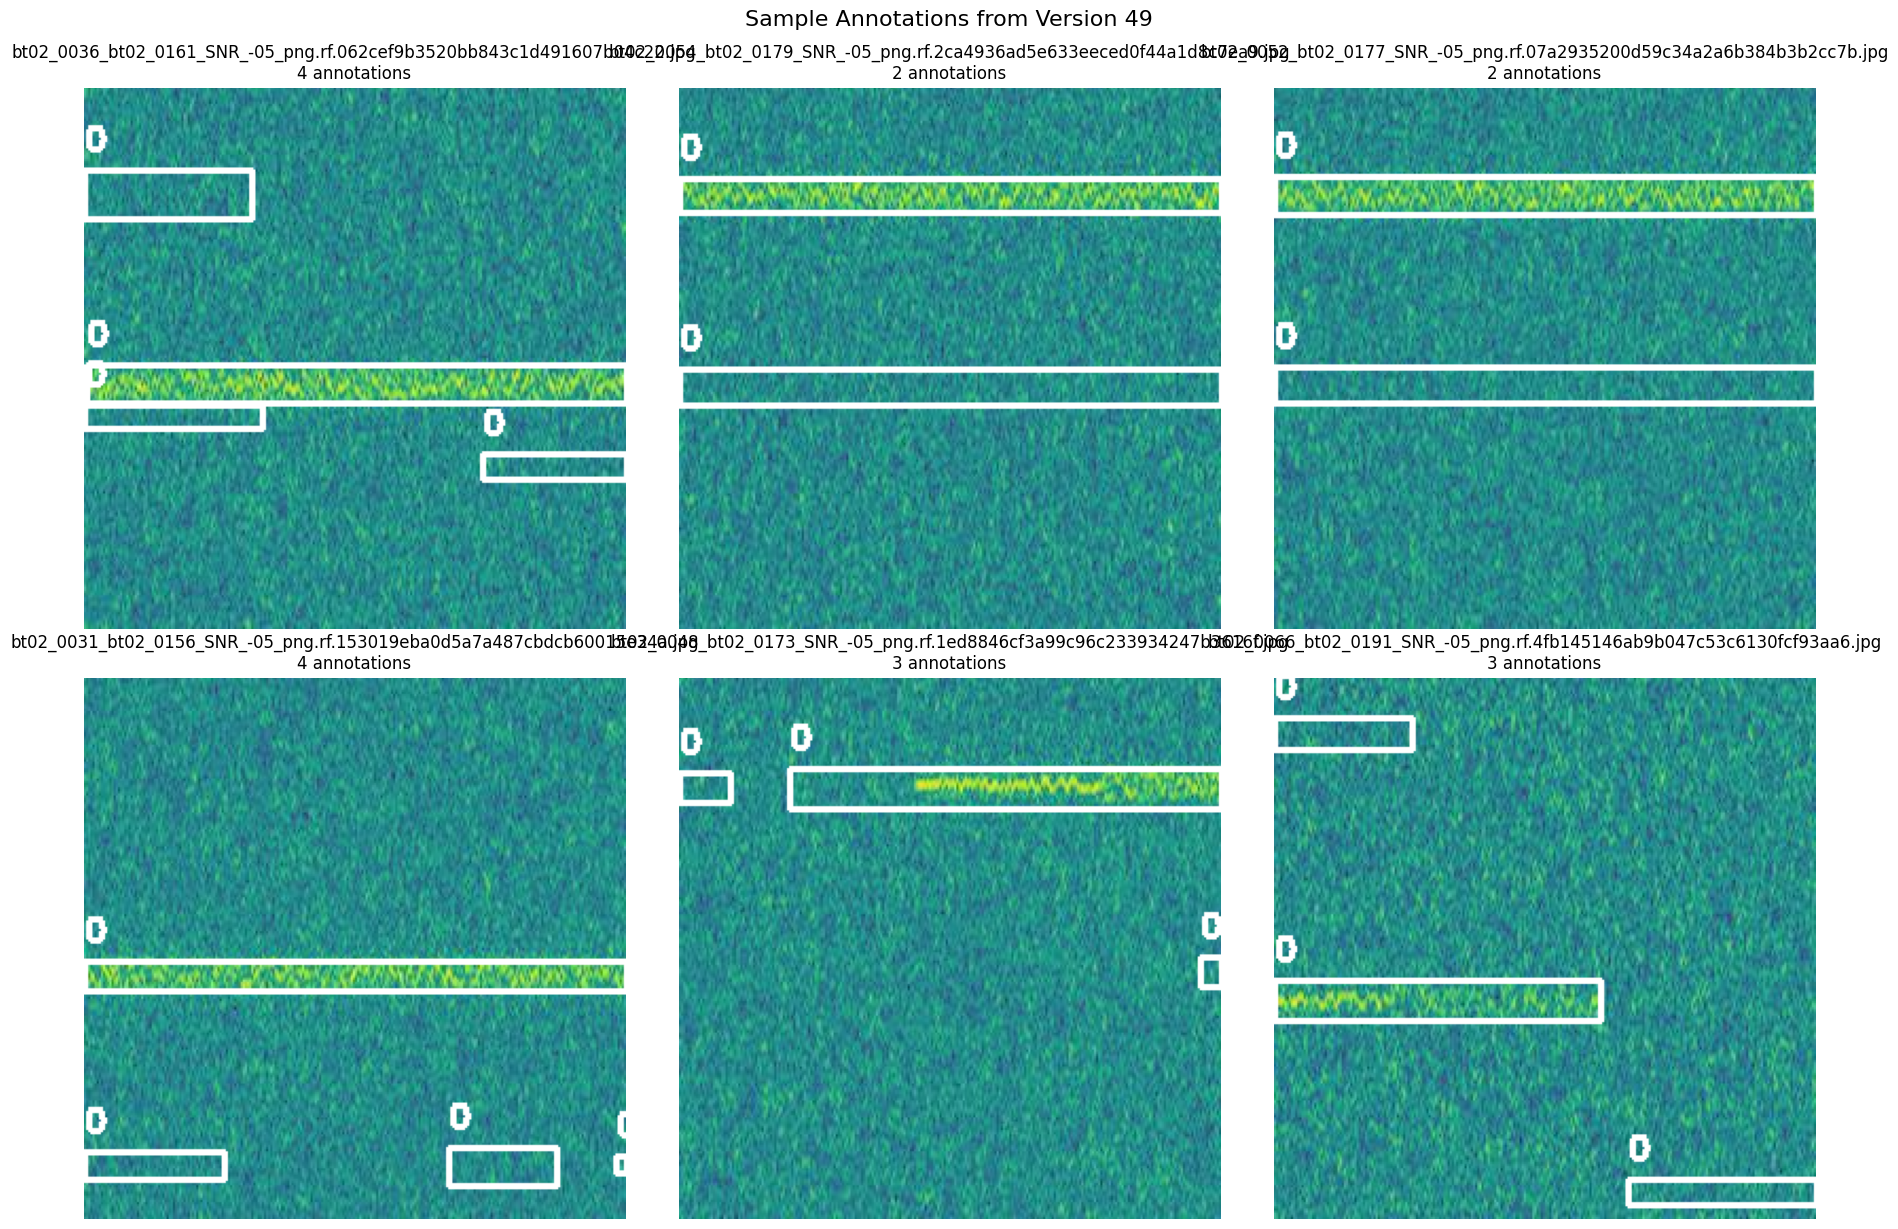

✅ Displayed 6 sample images with annotations


In [ ]:
# ============================================================================
# Cell 7: Visualize Sample Images with Annotations (FIXED)
# ============================================================================
def draw_bbox_on_image(image_path, annotations, categories, title=""):
    """Draw bounding boxes on image"""
    img = cv2.imread(str(image_path))

    # Check if image loaded successfully
    if img is None:
        print(f"⚠️  Could not load image: {image_path}")
        return None

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Color map for categories
    colors = {
        'bluetooth': (255, 0, 0),    # Red
        'wifi': (0, 255, 0),         # Green
        'zigbee': (0, 0, 255),       # Blue
        'drone': (255, 255, 0)       # Yellow
    }

    # Draw each bbox
    for ann in annotations:
        x, y, w, h = ann['bbox']
        cat_name = next(c['name'] for c in categories if c['id'] == ann['category_id'])
        color = colors.get(cat_name, (255, 255, 255))

        # Draw rectangle
        cv2.rectangle(img_rgb, (int(x), int(y)), (int(x+w), int(y+h)), color, 2)

        # Draw label
        cv2.putText(img_rgb, cat_name, (int(x), int(y)-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return img_rgb

# Create image_id to annotations mapping
image_annotations = {}
for ann in coco_data['annotations']:
    img_id = ann['image_id']
    if img_id not in image_annotations:
        image_annotations[img_id] = []
    image_annotations[img_id].append(ann)

# Find actual image files
print("🔍 Finding image files...")
all_images = list(DATASET_PATH.rglob('*.jpg')) + list(DATASET_PATH.rglob('*.png'))
print(f"   Found {len(all_images)} image files")

# Create filename to path mapping
image_path_map = {img.name: img for img in all_images}

# Also try without directory structure
for img in all_images:
    # Store both full path and just filename
    image_path_map[str(img.relative_to(DATASET_PATH))] = img

print(f"   Created mapping for {len(image_path_map)} paths")

# Display first 6 annotated images
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

displayed = 0
for idx, img_info in enumerate(coco_data['images']):
    if displayed >= 6:
        break

    img_id = img_info['id']
    img_filename = img_info['file_name']

    # Try multiple path combinations
    possible_paths = [
        DATASET_PATH / img_filename,
        DATASET_PATH / 'train' / img_filename,
        DATASET_PATH / 'valid' / img_filename,
        image_path_map.get(img_filename),
        image_path_map.get(Path(img_filename).name)
    ]

    # Find first valid path
    img_path = None
    for path in possible_paths:
        if path and Path(path).exists():
            img_path = path
            break

    if img_path is None:
        print(f"⚠️  Could not find: {img_filename}")
        continue

    # Get annotations for this image
    anns = image_annotations.get(img_id, [])

    # Draw and display
    img_with_boxes = draw_bbox_on_image(img_path, anns, coco_data['categories'])

    if img_with_boxes is not None:
        axes[displayed].imshow(img_with_boxes)
        axes[displayed].set_title(f"{Path(img_filename).name}\n{len(anns)} annotations")
        axes[displayed].axis('off')
        displayed += 1

# Hide unused subplots
for idx in range(displayed, 6):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle(f"Sample Annotations from Version {VERSION_TO_USE}", fontsize=16, y=1.02)
plt.show()

print(f"✅ Displayed {displayed} sample images with annotations")

# Debug: Show where images actually are
if displayed == 0:
    print("\n🔍 DEBUG: Actual image locations:")
    for img in all_images[:5]:
        print(f"   {img.relative_to(DATASET_PATH)}")
    print("\n🔍 DEBUG: Filenames in COCO JSON:")
    for img in coco_data['images'][:5]:
        print(f"   {img['file_name']}")

In [ ]:
# ============================================================================
# Cell 8: Direct API Access - Get Project Metadata
# ============================================================================
# You can also access project info directly via API
import requests

# Get project metadata
project_url = f"https://api.roboflow.com/{WORKSPACE}/{PROJECT}"
headers = {"Authorization": f"Bearer {API_KEY}"}

response = requests.get(f"{project_url}?api_key={API_KEY}")
project_info = response.json()

print(f"📋 Project Information:")
print(f"   Name: {project_info.get('project', {}).get('name')}")
print(f"   ID: {project_info.get('project', {}).get('id')}")
print(f"   Type: {project_info.get('project', {}).get('type')}")
print(f"   Classes: {project_info.get('project', {}).get('classes')}")
print(f"   Versions: {len(project_info.get('versions', []))}")

# List all versions with details
print(f"\n📦 Available Versions:")
for v in project_info.get('versions', []):
    print(f"   Version {v['name']}: {v.get('images', 0)} images, {v.get('splits', {}).get('train', 0)} train")

📋 Project Information:
   Name: ISM Band Results Dataset
   ID: intelligent-digital-communications/ism-band-results-dataset
   Type: object-detection
   Classes: {'0': 7199, 'unknown': 3, 'bluetooth': 318, 'weak_bluetooth': 67}
   Versions: 84

📦 Available Versions:
   Version Denoise_Dataset: 200 images, 0 train
   Version 2025-02-18 3:30am: 50 images, 0 train
   Version Ezra_Label_0217: 50 images, 0 train
   Version Kenny_Label_0217: 50 images, 0 train
   Version Gowtam_Label_0217: 50 images, 0 train
   Version Ishaan_Label_0217: 50 images, 0 train
   Version Adyant_Label: 50 images, 0 train
   Version Ansh Label: 50 images, 0 train
   Version bt02_bt02_scaling_000_SNR_n025: 50 images, 0 train
   Version bt02_bt02_scaling_000_SNR_n020: 50 images, 0 train
   Version bt02_bt02_scaling_000_SNR_n015: 50 images, 0 train
   Version bt02_bt02_scaling_000_SNR_n010: 50 images, 0 train
   Version bt02_bt02_scaling_000_SNR_n005: 50 images, 0 train
   Version bt02_bt02_scaling_000_SNR_020: 50 im

In [ ]:
# ============================================================================
# Cell 9: Alternative - Download via Direct URL
# ============================================================================
# You can also download via direct URL without SDK
DOWNLOAD_URL = f"https://app.roboflow.com/{WORKSPACE}/{PROJECT}/{VERSION_TO_USE}/download/coco"

print(f"📥 Direct download URL:")
print(f"   {DOWNLOAD_URL}?api_key={API_KEY}")
print(f"\n💡 You can use this URL with curl or wget:")
print(f"   curl -L '{DOWNLOAD_URL}?api_key={API_KEY}' -o dataset.zip")

📥 Direct download URL:
   https://app.roboflow.com/intelligent-digital-communications/ism-band-results-dataset/49/download/coco?api_key=V74EfwetgJtOmApcRI4g

💡 You can use this URL with curl or wget:
   curl -L 'https://app.roboflow.com/intelligent-digital-communications/ism-band-results-dataset/49/download/coco?api_key=V74EfwetgJtOmApcRI4g' -o dataset.zip


In [ ]:
# ============================================================================
# Cell 10: Export Key Information for Next Steps
# ============================================================================
# Save configuration for next notebook
config = {
    'dataset_path': str(DATASET_PATH),
    'version': VERSION_TO_USE,
    'splits': {k: {'count': v['count'], 'dir': str(v['dir'])} for k, v in splits.items()},
    'categories': coco_data['categories'],
    'total_images': len(coco_data['images']),
    'total_annotations': len(coco_data['annotations'])
}

config_path = Path('dataset_config.json')
with open(config_path, 'w') as f:
    json.dump(config, f, indent=2)

print(f"✅ Configuration saved to: {config_path}")
print(f"\n📊 Summary:")
print(f"   Dataset version: {VERSION_TO_USE}")
print(f"   Total images: {config['total_images']}")
print(f"   Total annotations: {config['total_annotations']}")
print(f"   Training images: {splits.get('train', {}).get('count', 0)}")
print(f"   Validation images: {splits.get('valid', {}).get('count', 0)}")
print(f"\n✅ Ready for next step: Channel & Temporal Slicing!")

✅ Configuration saved to: dataset_config.json

📊 Summary:
   Dataset version: 49
   Total images: 50
   Total annotations: 155
   Training images: 0
   Validation images: 0

✅ Ready for next step: Channel & Temporal Slicing!


In [ ]:
# ============================================================================
# Cell 1: Sequential Image Loading and Sorting
# ============================================================================
import re
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from collections import defaultdict
import json

def extract_sequence_info(filename):
    """
    Extract sequence number and metadata from filename

    Common patterns:
    - spec_0001.png, spec_0002.png
    - recording_001_frame_0045.jpg
    - 2437MHz_1234567890_frame001.png
    """
    # Try multiple patterns
    patterns = [
        r'(\d{4,})',           # 4+ consecutive digits
        r'_(\d+)\.',           # digits before extension
        r'frame[_-]?(\d+)',    # "frame" followed by digits
        r'win[_-]?(\d+)',      # "win" or "window" followed by digits
    ]

    for pattern in patterns:
        match = re.search(pattern, filename)
        if match:
            return int(match.group(1))

    return None

def load_sequential_images(dataset_path, sort_key='filename'):
    """
    Load images in sequential order

    Parameters:
    - dataset_path: Path to dataset
    - sort_key: 'filename', 'sequence', or 'timestamp'

    Returns:
    - List of dicts with image info
    """
    all_images = list(dataset_path.rglob('*.jpg')) + list(dataset_path.rglob('*.png'))

    image_data = []
    for img_path in all_images:
        seq_num = extract_sequence_info(img_path.name)

        image_data.append({
            'path': img_path,
            'filename': img_path.name,
            'sequence': seq_num if seq_num is not None else 9999999,
            'stem': img_path.stem
        })

    # Sort by sequence number
    image_data.sort(key=lambda x: (x['sequence'], x['filename']))

    print(f"📸 Loaded {len(image_data)} images in sequential order")
    print(f"   First: {image_data[0]['filename']} (seq: {image_data[0]['sequence']})")
    print(f"   Last: {image_data[-1]['filename']} (seq: {image_data[-1]['sequence']})")

    return image_data

# Load images
sequential_images = load_sequential_images(DATASET_PATH)


📸 Loaded 50 images in sequential order
   First: bt02_0025_bt02_0150_SNR_-05_png.rf.955b6d19240db5e9e57da796d4337898.jpg (seq: 25)
   Last: bt02_0074_bt02_0199_SNR_-05_png.rf.c9561cb05b093cdb7de19bcaa1ebdc3d.jpg (seq: 74)


🔍 Analyzing temporal overlap for 30 consecutive pairs...
   Pair 0: 50% overlap (correlation: 0.917)
   Pair 1: 50% overlap (correlation: 1.000)
   Pair 2: 50% overlap (correlation: 0.928)
   Pair 3: 50% overlap (correlation: 0.990)
   Pair 4: 50% overlap (correlation: 0.992)

📊 Overlap Statistics:
   Mean overlap: 50.0%
   Std deviation: 0.0%
   Min/Max: 50.0% / 50.0%
   Mean correlation: 0.977

🎨 Visualizing temporal overlap for first 3 pairs...

Pair 0: 50% overlap


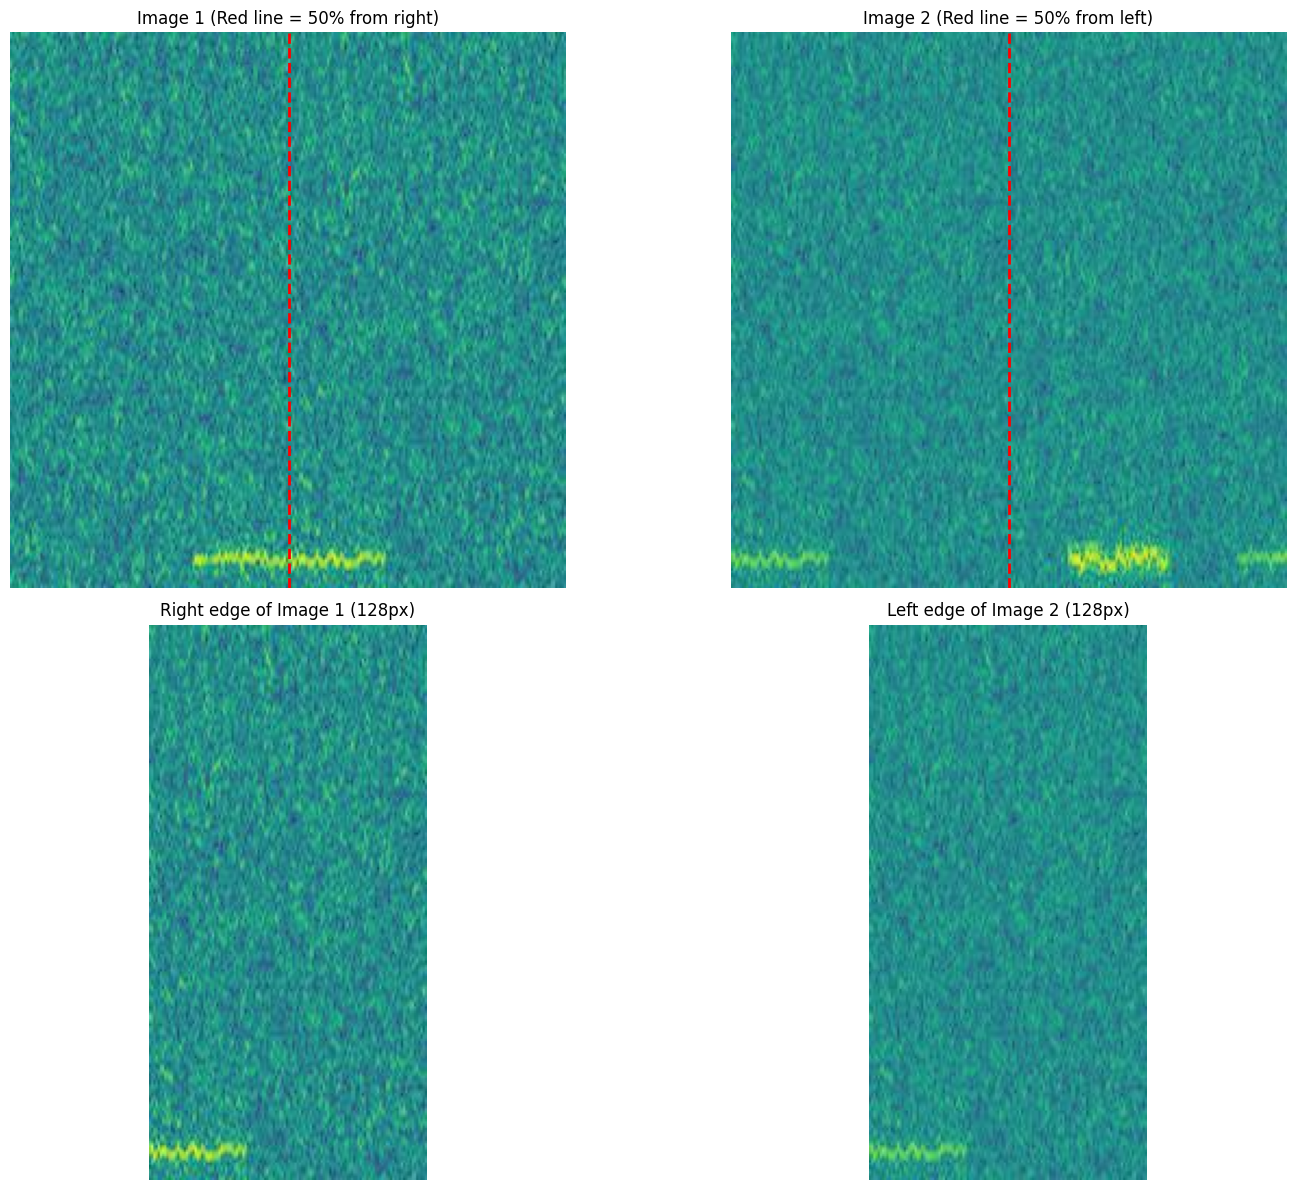


Pair 1: 50% overlap


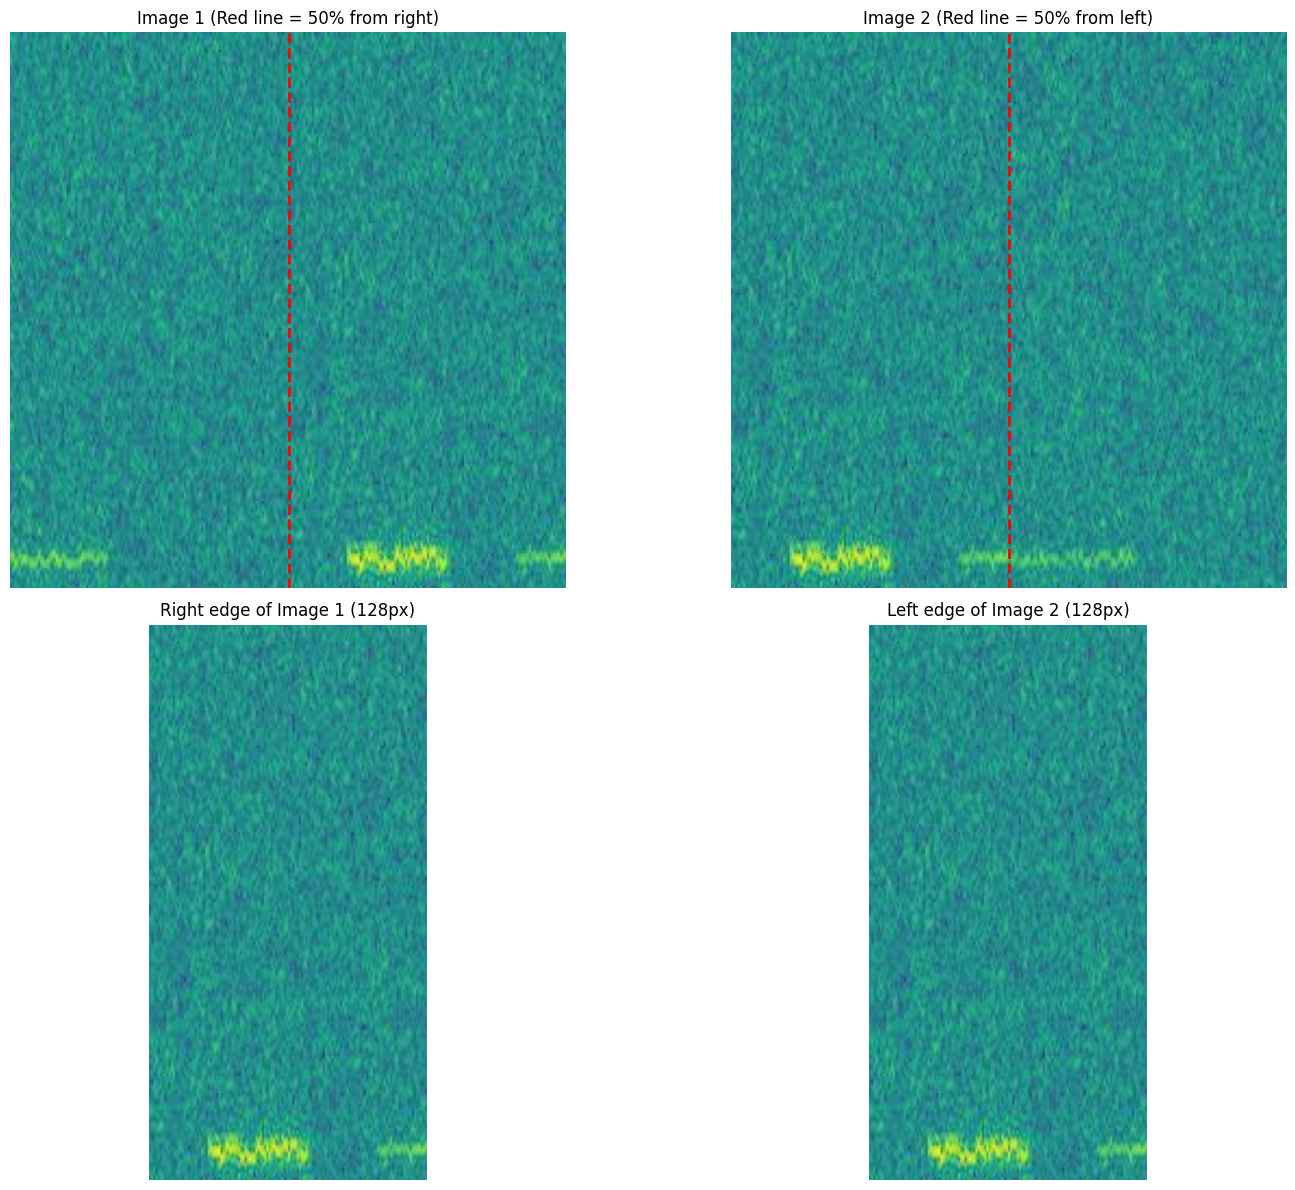


Pair 2: 50% overlap


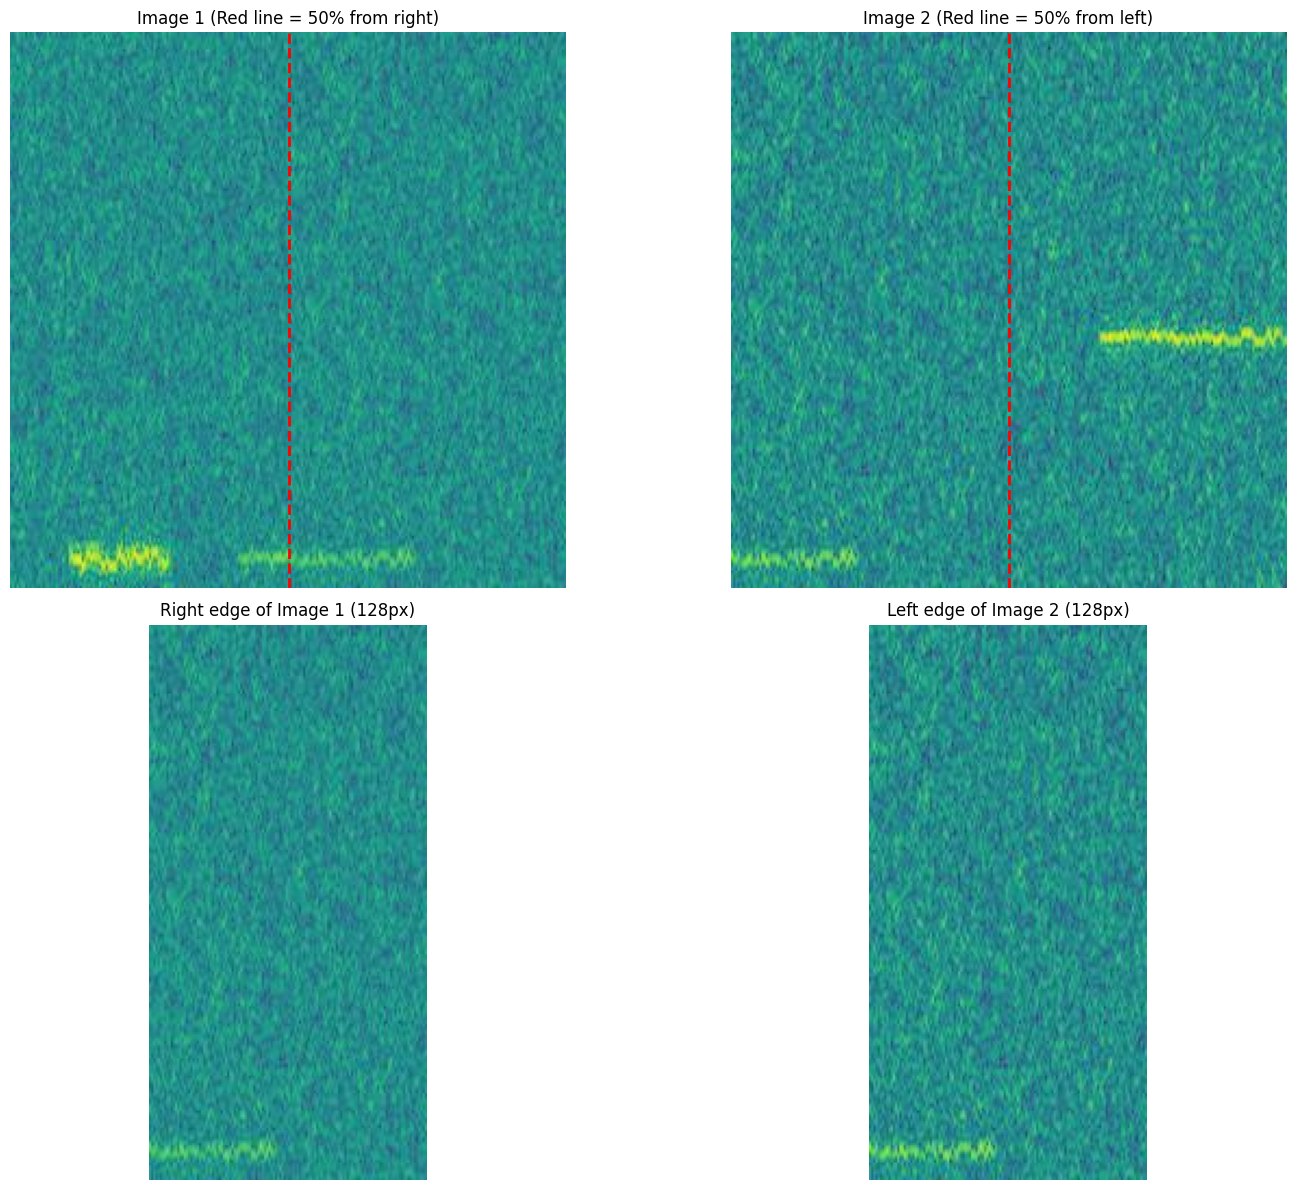

🔍 Checking signal continuity with 50.0% overlap assumption...
   Mean frequency profile correlation: 0.998
   ✅ Good continuity!
⏱️  Time Window Calculation:
   Base duration: 410 μs
   Overlap: 50.0%
   Stride: 205.0 μs
   Total coverage: 10455.0 μs (0.010 seconds)

📊 First 5 time windows:
   bt02_0025_bt02_0150_SNR_-05_png.rf.955b6d19240db5e9e57da796d4337898.jpg: 0.0 - 410.0 μs
   bt02_0026_bt02_0151_SNR_-05_png.rf.70a9d6a80e9d774659dc9d1b9289e263.jpg: 205.0 - 615.0 μs
   bt02_0027_bt02_0152_SNR_-05_png.rf.d683fd375de62bb0636369006bf3118b.jpg: 410.0 - 820.0 μs
   bt02_0028_bt02_0153_SNR_-05_png.rf.3107ced27f96d3666018576bf44ddc03.jpg: 615.0 - 1025.0 μs
   bt02_0029_bt02_0154_SNR_-05_png.rf.c2240ceb25413b78b8ce6148ec69e8c7.jpg: 820.0 - 1230.0 μs
🔍 Validating Bluetooth annotations...
   Found 0 potential annotation issues
✅ Exported sequential dataset to: /content/ISM-Band-Results-Dataset-49/sequential_annotations.json

✅ Sequential analysis complete!

📋 Summary:
   Total images: 50
  

In [ ]:
# ============================================================================
# Cell 2: Temporal Overlap Detection via Image Similarity
# ============================================================================
from scipy.signal import correlate2d
from skimage.metrics import structural_similarity as ssim

def compute_overlap_percentage(img1, img2, method='edge_correlation'):
    """
    Estimate temporal overlap between consecutive spectrograms

    Methods:
    - 'edge_correlation': Compare right edge of img1 with left edge of img2
    - 'ssim': Structural similarity
    - 'pixel_diff': Direct pixel difference

    Returns:
    - overlap_percent: Estimated overlap (0-100%)
    """
    # Convert to grayscale if needed
    if len(img1.shape) == 3:
        gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    else:
        gray1, gray2 = img1, img2

    height, width = gray1.shape

    if method == 'edge_correlation':
        # Compare overlapping regions at different percentages
        best_correlation = 0
        best_overlap = 0

        # Test overlap from 0% to 75% in 5% increments
        for overlap_pct in range(0, 80, 5):
            overlap_width = int(width * overlap_pct / 100)

            if overlap_width < 10:  # Skip tiny overlaps
                continue

            # Right edge of img1
            right_edge = gray1[:, -overlap_width:]
            # Left edge of img2
            left_edge = gray2[:, :overlap_width]

            # Compute correlation
            correlation = np.corrcoef(right_edge.flatten(), left_edge.flatten())[0, 1]

            if correlation > best_correlation:
                best_correlation = correlation
                best_overlap = overlap_pct

        return best_overlap, best_correlation

    elif method == 'ssim':
        # SSIM-based overlap detection
        best_ssim = 0
        best_overlap = 0

        for overlap_pct in range(0, 80, 5):
            overlap_width = int(width * overlap_pct / 100)

            if overlap_width < 10:
                continue

            right_edge = gray1[:, -overlap_width:]
            left_edge = gray2[:, :overlap_width]

            # Compute SSIM
            similarity = ssim(right_edge, left_edge)

            if similarity > best_ssim:
                best_ssim = similarity
                best_overlap = overlap_pct

        return best_overlap, best_ssim

def analyze_temporal_continuity(sequential_images, sample_size=20):
    """
    Analyze temporal overlap across consecutive image pairs
    """
    print(f"🔍 Analyzing temporal overlap for {sample_size} consecutive pairs...")

    overlap_results = []

    for i in range(min(sample_size, len(sequential_images) - 1)):
        img1_path = sequential_images[i]['path']
        img2_path = sequential_images[i + 1]['path']

        img1 = cv2.imread(str(img1_path))
        img2 = cv2.imread(str(img2_path))

        if img1 is None or img2 is None:
            continue

        overlap_pct, correlation = compute_overlap_percentage(img1, img2, method='edge_correlation')

        overlap_results.append({
            'pair': (sequential_images[i]['filename'], sequential_images[i + 1]['filename']),
            'overlap_percent': overlap_pct,
            'correlation': correlation,
            'index': i
        })

        if i < 5:  # Print first few
            print(f"   Pair {i}: {overlap_pct}% overlap (correlation: {correlation:.3f})")

    # Statistics
    overlaps = [r['overlap_percent'] for r in overlap_results]
    correlations = [r['correlation'] for r in overlap_results]

    print(f"\n📊 Overlap Statistics:")
    print(f"   Mean overlap: {np.mean(overlaps):.1f}%")
    print(f"   Std deviation: {np.std(overlaps):.1f}%")
    print(f"   Min/Max: {np.min(overlaps):.1f}% / {np.max(overlaps):.1f}%")
    print(f"   Mean correlation: {np.mean(correlations):.3f}")

    return overlap_results

# Analyze overlap
overlap_analysis = analyze_temporal_continuity(sequential_images, sample_size=30)

# ============================================================================
# Cell 3: Visualize Temporal Overlap
# ============================================================================
def visualize_overlap(img1_path, img2_path, overlap_pct):
    """
    Visualize the overlapping region between consecutive images
    """
    img1 = cv2.imread(str(img1_path))
    img2 = cv2.imread(str(img2_path))

    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    height, width = img1_rgb.shape[:2]
    overlap_width = int(width * overlap_pct / 100)

    # Create composite showing overlap
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Full images
    axes[0, 0].imshow(img1_rgb)
    axes[0, 0].axvline(x=width - overlap_width, color='red', linewidth=2, linestyle='--')
    axes[0, 0].set_title(f"Image 1 (Red line = {overlap_pct}% from right)")
    axes[0, 0].axis('off')

    axes[0, 1].imshow(img2_rgb)
    axes[0, 1].axvline(x=overlap_width, color='red', linewidth=2, linestyle='--')
    axes[0, 1].set_title(f"Image 2 (Red line = {overlap_pct}% from left)")
    axes[0, 1].axis('off')

    # Overlapping regions
    right_edge = img1_rgb[:, -overlap_width:]
    left_edge = img2_rgb[:, :overlap_width]

    axes[1, 0].imshow(right_edge)
    axes[1, 0].set_title(f"Right edge of Image 1 ({overlap_width}px)")
    axes[1, 0].axis('off')

    axes[1, 1].imshow(left_edge)
    axes[1, 1].set_title(f"Left edge of Image 2 ({overlap_width}px)")
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Visualize first few pairs
print("\n🎨 Visualizing temporal overlap for first 3 pairs...")
for i in range(min(3, len(overlap_analysis))):
    result = overlap_analysis[i]
    img1_path = sequential_images[result['index']]['path']
    img2_path = sequential_images[result['index'] + 1]['path']

    print(f"\nPair {i}: {result['overlap_percent']}% overlap")
    visualize_overlap(img1_path, img2_path, result['overlap_percent'])

# ============================================================================
# Cell 4: Detect Signal Continuity (Bluetooth Hops)
# ============================================================================
def detect_signal_continuity(sequential_images, overlap_pct, num_samples=10):
    """
    Check if signals (especially Bluetooth hops) continue across frames

    If overlap is correct, signals should appear in same frequency position
    across consecutive frames
    """
    print(f"🔍 Checking signal continuity with {overlap_pct}% overlap assumption...")

    continuity_scores = []

    for i in range(min(num_samples, len(sequential_images) - 1)):
        img1_path = sequential_images[i]['path']
        img2_path = sequential_images[i + 1]['path']

        img1 = cv2.imread(str(img1_path), cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(str(img2_path), cv2.IMREAD_GRAYSCALE)

        if img1 is None or img2 is None:
            continue

        height, width = img1.shape
        overlap_width = int(width * overlap_pct / 100)

        # Compare frequency profiles (vertical averages)
        if overlap_width > 0:
            profile1 = np.mean(img1[:, -overlap_width:], axis=1)
            profile2 = np.mean(img2[:, :overlap_width], axis=1)

            # Compute correlation of frequency profiles
            correlation = np.corrcoef(profile1, profile2)[0, 1]
            continuity_scores.append(correlation)

    mean_continuity = np.mean(continuity_scores)
    print(f"   Mean frequency profile correlation: {mean_continuity:.3f}")
    print(f"   {'✅ Good continuity!' if mean_continuity > 0.7 else '⚠️  Weak continuity'}")

    return continuity_scores

# Test continuity
continuity = detect_signal_continuity(
    sequential_images,
    overlap_pct=np.mean([r['overlap_percent'] for r in overlap_analysis]),
    num_samples=20
)

# ============================================================================
# Cell 5: Calculate Actual Time Windows
# ============================================================================
def calculate_time_windows(sequential_images, overlap_pct, base_duration_us=410):
    """
    Calculate actual time coverage for each spectrogram

    Georgia Tech paper: 410 μs per frame

    Parameters:
    - overlap_pct: Estimated overlap percentage
    - base_duration_us: Duration of each frame in microseconds

    Returns:
    - List of time windows for each frame
    """
    stride_us = base_duration_us * (1 - overlap_pct / 100)

    time_windows = []
    current_time = 0

    for i, img_info in enumerate(sequential_images):
        end_time = current_time + base_duration_us

        time_windows.append({
            'filename': img_info['filename'],
            'sequence': img_info['sequence'],
            'start_us': current_time,
            'end_us': end_time,
            'duration_us': base_duration_us,
            'overlap_with_next_us': base_duration_us - stride_us
        })

        current_time += stride_us

    print(f"⏱️  Time Window Calculation:")
    print(f"   Base duration: {base_duration_us} μs")
    print(f"   Overlap: {overlap_pct:.1f}%")
    print(f"   Stride: {stride_us:.1f} μs")
    print(f"   Total coverage: {time_windows[-1]['end_us']:.1f} μs ({time_windows[-1]['end_us']/1e6:.3f} seconds)")

    return time_windows

# Calculate time windows
mean_overlap = np.mean([r['overlap_percent'] for r in overlap_analysis])
time_windows = calculate_time_windows(sequential_images, mean_overlap)

# Display first few windows
print(f"\n📊 First 5 time windows:")
for tw in time_windows[:5]:
    print(f"   {tw['filename']}: {tw['start_us']:.1f} - {tw['end_us']:.1f} μs")

# ============================================================================
# Cell 6: Validate Annotations Against Temporal Continuity
# ============================================================================
def validate_bluetooth_annotations(coco_data, sequential_images, time_windows):
    """
    Check if Bluetooth annotations make sense temporally

    Bluetooth hops every 625 μs, so:
    - Multiple hops should appear across consecutive frames
    - Frequency should change (frequency hopping)
    - Similar power levels
    """
    print("🔍 Validating Bluetooth annotations...")

    # Group annotations by image
    img_name_to_id = {img['file_name']: img['id'] for img in coco_data['images']}
    img_id_to_anns = defaultdict(list)

    for ann in coco_data['annotations']:
        if ann['category_id'] == 1:  # Bluetooth
            img_id_to_anns[ann['image_id']].append(ann)

    # Check annotation consistency
    issues = []

    for i in range(len(sequential_images) - 1):
        img1_name = sequential_images[i]['filename']
        img2_name = sequential_images[i + 1]['filename']

        img1_id = img_name_to_id.get(img1_name)
        img2_id = img_name_to_id.get(img2_name)

        if not img1_id or not img2_id:
            continue

        anns1 = img_id_to_anns[img1_id]
        anns2 = img_id_to_anns[img2_id]

        # Check 1: Overlapping region should have similar annotations
        time1 = time_windows[i]
        time2 = time_windows[i + 1]
        overlap_time = time1['overlap_with_next_us']

        if overlap_time > 100:  # Significant overlap
            # Annotations in overlap region of img1 should appear in img2
            # This is a simplified check
            count_diff = abs(len(anns1) - len(anns2))
            if count_diff > 5:  # Arbitrary threshold
                issues.append({
                    'pair': (img1_name, img2_name),
                    'issue': 'Large annotation count difference',
                    'counts': (len(anns1), len(anns2))
                })

    print(f"   Found {len(issues)} potential annotation issues")
    if issues:
        print(f"\n⚠️  Sample issues:")
        for issue in issues[:5]:
            print(f"      {issue['pair'][0]} -> {issue['pair'][1]}")
            print(f"      Counts: {issue['counts'][0]} vs {issue['counts'][1]}")

    return issues

# Validate annotations
if 'coco_data' in globals():
    annotation_issues = validate_bluetooth_annotations(coco_data, sequential_images, time_windows)

# ============================================================================
# Cell 7: Export Sequential Dataset with Time Metadata
# ============================================================================
def export_sequential_dataset(sequential_images, time_windows, coco_data, output_path):
    """
    Export dataset with corrected temporal metadata
    """
    # Create enhanced COCO format
    enhanced_coco = {
        'info': {
            **coco_data['info'],
            'temporal_analysis': {
                'mean_overlap_percent': mean_overlap,
                'base_duration_us': 410,
                'total_duration_us': time_windows[-1]['end_us']
            }
        },
        'images': [],
        'annotations': coco_data['annotations'],
        'categories': coco_data['categories']
    }

    # Add temporal metadata to images
    filename_to_window = {tw['filename']: tw for tw in time_windows}

    for img_info in coco_data['images']:
        filename = img_info['file_name']
        time_window = filename_to_window.get(filename, {})

        enhanced_img = {
            **img_info,
            'temporal_metadata': {
                'start_time_us': time_window.get('start_us', 0),
                'end_time_us': time_window.get('end_us', 410),
                'duration_us': time_window.get('duration_us', 410)
            }
        }
        enhanced_coco['images'].append(enhanced_img)

    # Save
    output_file = Path(output_path) / 'sequential_annotations.json'
    with open(output_file, 'w') as f:
        json.dump(enhanced_coco, f, indent=2)

    print(f"✅ Exported sequential dataset to: {output_file}")
    return output_file

# Export
if 'coco_data' in globals():
    sequential_output = export_sequential_dataset(
        sequential_images,
        time_windows,
        coco_data,
        DATASET_PATH
    )

print("\n✅ Sequential analysis complete!")
print(f"\n📋 Summary:")
print(f"   Total images: {len(sequential_images)}")
print(f"   Estimated overlap: {mean_overlap:.1f}%")
print(f"   Total recording duration: {time_windows[-1]['end_us']/1e6:.3f} seconds")
print(f"   Time resolution: {410 * (1 - mean_overlap/100):.1f} μs per frame")

In [ ]:
"""
Channel and Temporal Slicing Pipeline for RF Spectrograms
Generates augmented dataset from sequential spectrograms with 50% temporal overlap
"""

# ============================================================================
# Cell 1: Setup and Configuration
# ============================================================================
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import json
from dataclasses import dataclass
from typing import List, Dict, Tuple, Optional
from collections import defaultdict
import shutil

@dataclass
class BoundingBox:
    """Bounding box in pixel coordinates"""
    x: float
    y: float
    width: float
    height: float
    category_id: int
    category_name: str

    def intersection_ratio(self, x_min, x_max, y_min, y_max):
        """Calculate what percentage of bbox is within given bounds"""
        # Calculate intersection
        inter_x_min = max(self.x, x_min)
        inter_y_min = max(self.y, y_min)
        inter_x_max = min(self.x + self.width, x_max)
        inter_y_max = min(self.y + self.height, y_max)

        # Check if there's any intersection
        if inter_x_max <= inter_x_min or inter_y_max <= inter_y_min:
            return 0.0

        inter_area = (inter_x_max - inter_x_min) * (inter_y_max - inter_y_min)
        bbox_area = self.width * self.height

        return inter_area / bbox_area if bbox_area > 0 else 0.0

    def transform(self, x_offset, y_offset, scale_x=1.0, scale_y=1.0):
        """Transform bbox coordinates"""
        return BoundingBox(
            x=(self.x - x_offset) * scale_x,
            y=(self.y - y_offset) * scale_y,
            width=self.width * scale_x,
            height=self.height * scale_y,
            category_id=self.category_id,
            category_name=self.category_name
        )

    def to_coco(self):
        """Convert to COCO format [x, y, width, height]"""
        return [self.x, self.y, self.width, self.height]

    def to_yolo(self, img_width, img_height):
        """Convert to YOLO format [class, x_center, y_center, width, height] (normalized)"""
        x_center = (self.x + self.width / 2) / img_width
        y_center = (self.y + self.height / 2) / img_height
        w_norm = self.width / img_width
        h_norm = self.height / img_height
        return [self.category_id - 1, x_center, y_center, w_norm, h_norm]

# RF Signal Parameters (Channel 6)
SIGNAL_CONFIG = {
    'center_freq_hz': 2.437e9,      # 2.437 GHz
    'bandwidth_hz': 20e6,           # 20 MHz (2.427 - 2.447 GHz)
    'time_duration_us': 410,        # 410 μs per frame
    'detected_overlap': 0.50,       # 50% overlap detected from analysis
    'actual_stride_us': 205,        # 410 × (1 - 0.5) = 205 μs stride
    'freq_range_mhz': (2427, 2447)  # MHz
}

# Slicing Configuration
SLICE_CONFIG = {
    'num_freq_channels': 4,         # Split 20 MHz into 4 × 5 MHz channels
    'temporal_overlap': 0.75,       # 75% overlap for NEW temporal slices
    'min_bbox_overlap': 0.3,        # Keep bbox if 30%+ remains in slice
    'output_size': (640, 640)       # Standard YOLO input size
}

print("✅ Configuration loaded")
print(f"   Frequency: {SIGNAL_CONFIG['freq_range_mhz'][0]} - {SIGNAL_CONFIG['freq_range_mhz'][1]} MHz")
print(f"   Existing overlap: {SIGNAL_CONFIG['detected_overlap']*100}% (205 μs stride)")
print(f"   Channel slicing: {SLICE_CONFIG['num_freq_channels']} channels × 5 MHz")
print(f"   New temporal slicing: {SLICE_CONFIG['temporal_overlap']*100}% overlap")


✅ Configuration loaded
   Frequency: 2427 - 2447 MHz
   Existing overlap: 50.0% (205 μs stride)
   Channel slicing: 4 channels × 5 MHz
   New temporal slicing: 75.0% overlap


In [ ]:

# ============================================================================
# Cell 2: Channel Slicing Implementation
# ============================================================================
class ChannelSlicer:
    """
    Slice spectrograms into frequency sub-bands

    For 20 MHz with 4 channels:
    - Channel 0: 2427 - 2432 MHz (bottom of image)
    - Channel 1: 2432 - 2437 MHz
    - Channel 2: 2437 - 2442 MHz
    - Channel 3: 2442 - 2447 MHz (top of image)
    """

    def __init__(self, num_channels=4):
        self.num_channels = num_channels
        self.freq_min = SIGNAL_CONFIG['freq_range_mhz'][0]
        self.freq_max = SIGNAL_CONFIG['freq_range_mhz'][1]
        self.channel_bw = (self.freq_max - self.freq_min) / num_channels

    def slice_image(self, image: np.ndarray) -> List[Dict]:
        """
        Slice image into frequency channels

        Returns:
        - List of dicts with 'image', 'channel_idx', 'freq_range', 'pixel_range'
        """
        height, width = image.shape[:2]
        channel_height = height // self.num_channels

        channels = []
        for ch_idx in range(self.num_channels):
            # Calculate pixel range (Y-axis in spectrogram)
            # Note: Image Y increases downward, but frequency increases upward
            # So we reverse: channel 0 = bottom of spectrum = top of image
            start_row = (self.num_channels - 1 - ch_idx) * channel_height
            end_row = start_row + channel_height if ch_idx < self.num_channels - 1 else height

            # Extract channel
            channel_img = image[start_row:end_row, :, :]

            # Calculate frequency range
            freq_start = self.freq_min + ch_idx * self.channel_bw
            freq_end = freq_start + self.channel_bw

            channels.append({
                'image': channel_img,
                'channel_idx': ch_idx,
                'freq_range_mhz': (freq_start, freq_end),
                'pixel_range': (start_row, end_row),
                'height': end_row - start_row,
                'width': width
            })

        return channels

    def transform_bboxes(self, bboxes: List[BoundingBox], channel_info: Dict) -> List[BoundingBox]:
        """
        Transform bounding boxes to channel coordinate system
        Only keep bboxes that significantly overlap with channel
        """
        start_row, end_row = channel_info['pixel_range']

        transformed = []
        for bbox in bboxes:
            # Calculate overlap ratio
            overlap = bbox.intersection_ratio(0, channel_info['width'], start_row, end_row)

            if overlap >= SLICE_CONFIG['min_bbox_overlap']:
                # Transform coordinates
                new_bbox = bbox.transform(
                    x_offset=0,
                    y_offset=start_row,
                    scale_x=1.0,
                    scale_y=1.0
                )

                # Clip to channel bounds
                new_bbox.y = max(0, new_bbox.y)
                new_bbox.height = min(new_bbox.height, channel_info['height'] - new_bbox.y)

                transformed.append(new_bbox)

        return transformed

# Initialize channel slicer
channel_slicer = ChannelSlicer(num_channels=SLICE_CONFIG['num_freq_channels'])

print("✅ Channel slicer initialized")
print(f"   Channels: {SLICE_CONFIG['num_freq_channels']}")
for ch_idx in range(SLICE_CONFIG['num_freq_channels']):
    freq_start = channel_slicer.freq_min + ch_idx * channel_slicer.channel_bw
    freq_end = freq_start + channel_slicer.channel_bw
    print(f"   Channel {ch_idx}: {freq_start:.1f} - {freq_end:.1f} MHz")


✅ Channel slicer initialized
   Channels: 4
   Channel 0: 2427.0 - 2432.0 MHz
   Channel 1: 2432.0 - 2437.0 MHz
   Channel 2: 2437.0 - 2442.0 MHz
   Channel 3: 2442.0 - 2447.0 MHz


In [ ]:

# ============================================================================
# Cell 3: Temporal Slicing Implementation
# ============================================================================
class TemporalSlicer:
    """
    Slice spectrograms into temporal windows with overlap

    Creates additional slices from each spectrogram to increase dataset size
    """

    def __init__(self, overlap=0.75):
        self.overlap = overlap

    def slice_image(self, image: np.ndarray) -> List[Dict]:
        """
        Slice image into overlapping temporal windows

        For 50% overlap with 256px width:
        - Window 0: 0 - 128px
        - Window 1: 64 - 192px (50% overlap)
        - Window 2: 128 - 256px

        Returns:
        - List of dicts with 'image', 'window_idx', 'pixel_range', 'time_range_us'
        """
        height, width = image.shape[:2]

        # Calculate window parameters
        window_width = width // 2  # Half-width windows
        stride = int(window_width * (1 - self.overlap))

        windows = []
        window_idx = 0

        for start_col in range(0, width - window_width + 1, stride):
            end_col = start_col + window_width

            # Extract window
            window_img = image[:, start_col:end_col, :]

            # Calculate time range
            # Each full frame = 410 μs
            time_start = (start_col / width) * SIGNAL_CONFIG['time_duration_us']
            time_end = (end_col / width) * SIGNAL_CONFIG['time_duration_us']

            windows.append({
                'image': window_img,
                'window_idx': window_idx,
                'pixel_range': (start_col, end_col),
                'time_range_us': (time_start, time_end),
                'width': end_col - start_col,
                'height': height
            })

            window_idx += 1

        return windows

    def transform_bboxes(self, bboxes: List[BoundingBox], window_info: Dict, img_height: int) -> List[BoundingBox]:
        """
        Transform bounding boxes to window coordinate system
        Only keep bboxes that significantly overlap with window
        """
        start_col, end_col = window_info['pixel_range']

        transformed = []
        for bbox in bboxes:
            # Calculate overlap ratio
            overlap = bbox.intersection_ratio(start_col, end_col, 0, img_height)

            if overlap >= SLICE_CONFIG['min_bbox_overlap']:
                # Transform coordinates
                new_bbox = bbox.transform(
                    x_offset=start_col,
                    y_offset=0,
                    scale_x=1.0,
                    scale_y=1.0
                )

                # Clip to window bounds
                new_bbox.x = max(0, new_bbox.x)
                new_bbox.width = min(new_bbox.width, window_info['width'] - new_bbox.x)

                transformed.append(new_bbox)

        return transformed

# Initialize temporal slicer
temporal_slicer = TemporalSlicer(overlap=SLICE_CONFIG['temporal_overlap'])

print("✅ Temporal slicer initialized")
print(f"   Overlap: {SLICE_CONFIG['temporal_overlap']*100}%")
print(f"   Will create ~3 windows per spectrogram")


✅ Temporal slicer initialized
   Overlap: 75.0%
   Will create ~3 windows per spectrogram


In [ ]:

# ============================================================================
# Cell 4: Load and Prepare Data
# ============================================================================
def load_coco_annotations(annotation_path):
    """Load COCO format annotations"""
    with open(annotation_path, 'r') as f:
        coco_data = json.load(f)

    # Create mappings
    img_id_to_info = {img['id']: img for img in coco_data['images']}
    img_name_to_id = {img['file_name']: img['id'] for img in coco_data['images']}

    # Group annotations by image
    img_id_to_anns = defaultdict(list)
    for ann in coco_data['annotations']:
        img_id_to_anns[ann['image_id']].append(ann)

    # Category mapping
    cat_id_to_name = {cat['id']: cat['name'] for cat in coco_data['categories']}

    return coco_data, img_id_to_info, img_name_to_id, img_id_to_anns, cat_id_to_name

def coco_ann_to_bbox(ann, cat_id_to_name):
    """Convert COCO annotation to BoundingBox object"""
    x, y, w, h = ann['bbox']
    return BoundingBox(
        x=x, y=y, width=w, height=h,
        category_id=ann['category_id'],
        category_name=cat_id_to_name[ann['category_id']]
    )

# Load annotations
print("📖 Loading annotations...")
coco_data, img_id_to_info, img_name_to_id, img_id_to_anns, cat_id_to_name = load_coco_annotations(
    train_annotations_path
)

print(f"✅ Loaded {len(coco_data['images'])} images with {len(coco_data['annotations'])} annotations")
print(f"   Categories: {list(cat_id_to_name.values())}")

# ============================================================================
# Cell 5: Slicing Pipeline - Full Processing
# ============================================================================
class SlicingPipeline:
    """
    Complete pipeline for channel and temporal slicing
    """

    def __init__(self, output_dir, channel_slicer, temporal_slicer):
        self.output_dir = Path(output_dir)
        self.channel_slicer = channel_slicer
        self.temporal_slicer = temporal_slicer

        # Create output structure
        self.setup_directories()

        # Initialize COCO output
        self.coco_output = {
            'info': {
                'description': 'RF Signal Detection - Sliced Dataset',
                'version': '1.0',
                'year': 2025,
                'contributor': 'Channel & Temporal Slicing Pipeline'
            },
            'licenses': [],
            'images': [],
            'annotations': [],
            'categories': coco_data['categories']
        }

        self.image_id = 1
        self.annotation_id = 1

    def setup_directories(self):
        """Create output directory structure"""
        dirs = [
            self.output_dir / 'images' / 'full',
            self.output_dir / 'images' / 'freq_sliced',
            self.output_dir / 'images' / 'temp_sliced',
            self.output_dir / 'images' / 'combined_sliced',
            self.output_dir / 'labels_yolo',
            self.output_dir / 'annotations'
        ]
        for d in dirs:
            d.mkdir(parents=True, exist_ok=True)

    def process_image(self, img_path, img_info, annotations, slice_mode='both'):
        """
        Process single image with specified slicing mode

        Parameters:
        - img_path: Path to image file
        - img_info: Image info dict from COCO
        - annotations: List of BoundingBox objects
        - slice_mode: 'full', 'frequency', 'temporal', or 'both'
        """
        # Load image
        image = cv2.imread(str(img_path))
        if image is None:
            print(f"⚠️  Could not load: {img_path}")
            return 0

        slices_created = 0
        base_name = Path(img_path).stem

        # Original full image
        if slice_mode in ['full', 'both']:
            self._save_slice(
                image, annotations,
                f"{base_name}_full.jpg",
                'full',
                {'source': str(img_path), 'slice_type': 'full'}
            )
            slices_created += 1

        # Frequency channel slicing
        if slice_mode in ['frequency', 'both']:
            freq_channels = self.channel_slicer.slice_image(image)

            for ch in freq_channels:
                ch_anns = self.channel_slicer.transform_bboxes(annotations, ch)

                self._save_slice(
                    ch['image'], ch_anns,
                    f"{base_name}_freq_ch{ch['channel_idx']}.jpg",
                    'freq_sliced',
                    {
                        'source': str(img_path),
                        'slice_type': 'frequency',
                        'channel_idx': ch['channel_idx'],
                        'freq_range_mhz': ch['freq_range_mhz']
                    }
                )
                slices_created += 1

        # Temporal slicing
        if slice_mode in ['temporal', 'both']:
            temp_windows = self.temporal_slicer.slice_image(image)

            for win in temp_windows:
                win_anns = self.temporal_slicer.transform_bboxes(
                    annotations, win, image.shape[0]
                )

                self._save_slice(
                    win['image'], win_anns,
                    f"{base_name}_temp_win{win['window_idx']}.jpg",
                    'temp_sliced',
                    {
                        'source': str(img_path),
                        'slice_type': 'temporal',
                        'window_idx': win['window_idx'],
                        'time_range_us': win['time_range_us']
                    }
                )
                slices_created += 1

        # Combined: frequency + temporal
        if slice_mode == 'both':
            freq_channels = self.channel_slicer.slice_image(image)

            for ch in freq_channels:
                temp_windows = self.temporal_slicer.slice_image(ch['image'])

                for win in temp_windows:
                    # First transform to frequency channel
                    ch_anns = self.channel_slicer.transform_bboxes(annotations, ch)

                    # Then transform to temporal window
                    combined_anns = self.temporal_slicer.transform_bboxes(
                        ch_anns, win, ch['image'].shape[0]
                    )

                    self._save_slice(
                        win['image'], combined_anns,
                        f"{base_name}_ch{ch['channel_idx']}_win{win['window_idx']}.jpg",
                        'combined_sliced',
                        {
                            'source': str(img_path),
                            'slice_type': 'combined',
                            'channel_idx': ch['channel_idx'],
                            'window_idx': win['window_idx'],
                            'freq_range_mhz': ch['freq_range_mhz'],
                            'time_range_us': win['time_range_us']
                        }
                    )
                    slices_created += 1

        return slices_created

    def _save_slice(self, image, annotations, filename, subdirectory, metadata):
        """Save image slice with annotations"""
        # Resize to standard size
        img_resized = cv2.resize(image, SLICE_CONFIG['output_size'])
        orig_height, orig_width = image.shape[:2]
        target_height, target_width = SLICE_CONFIG['output_size']

        scale_x = target_width / orig_width
        scale_y = target_height / orig_height

        # Save image
        img_path = self.output_dir / 'images' / subdirectory / filename
        cv2.imwrite(str(img_path), img_resized)

        # Add to COCO
        self.coco_output['images'].append({
            'id': self.image_id,
            'file_name': f"{subdirectory}/{filename}",
            'width': target_width,
            'height': target_height,
            'metadata': metadata
        })

        # Add annotations
        yolo_labels = []
        for bbox in annotations:
            # Scale bbox
            scaled_bbox = bbox.transform(0, 0, scale_x, scale_y)

            # COCO format
            self.coco_output['annotations'].append({
                'id': self.annotation_id,
                'image_id': self.image_id,
                'category_id': scaled_bbox.category_id,
                'bbox': scaled_bbox.to_coco(),
                'area': scaled_bbox.width * scaled_bbox.height,
                'iscrowd': 0
            })

            # YOLO format
            yolo_labels.append(scaled_bbox.to_yolo(target_width, target_height))

            self.annotation_id += 1

        # Save YOLO labels
        if yolo_labels:
            label_file = self.output_dir / 'labels_yolo' / f"{Path(filename).stem}.txt"
            with open(label_file, 'w') as f:
                for label in yolo_labels:
                    f.write(' '.join(map(str, label)) + '\n')

        self.image_id += 1

    def save_coco_json(self):
        """Save COCO annotations"""
        json_path = self.output_dir / 'annotations' / 'instances.json'
        with open(json_path, 'w') as f:
            json.dump(self.coco_output, f, indent=2)

        print(f"\n✅ COCO annotations saved: {json_path}")
        return json_path

# Initialize pipeline
output_dir = DATASET_PATH.parent / 'dataset_sliced'
pipeline = SlicingPipeline(output_dir, channel_slicer, temporal_slicer)

print(f"✅ Pipeline initialized")
print(f"   Output directory: {output_dir}")


📖 Loading annotations...
✅ Loaded 50 images with 155 annotations
   Categories: ['bluetooth-drone', '0']
✅ Pipeline initialized
   Output directory: /content/dataset_sliced


In [ ]:
# ============================================================================
# Cell 5.5: Fix Image Path Finding
# ============================================================================
def find_image_file(dataset_path, filename):
    """
    Robustly find image file regardless of directory structure
    """
    # Try direct paths first
    direct_paths = [
        dataset_path / filename,
        dataset_path / 'train' / filename,
        dataset_path / 'valid' / filename,
        dataset_path / 'test' / filename,
    ]

    for path in direct_paths:
        if path.exists():
            return path

    # Search recursively for any matching filename
    possible_matches = list(dataset_path.rglob(filename))
    if possible_matches:
        return possible_matches[0]

    # Try matching just the base name (ignore path in filename)
    base_name = Path(filename).name
    possible_matches = list(dataset_path.rglob(base_name))
    if possible_matches:
        return possible_matches[0]

    # Try matching with wildcards (in case of file extension mismatch)
    stem = Path(filename).stem
    for ext in ['.jpg', '.png', '.jpeg', '.JPG', '.PNG']:
        matches = list(dataset_path.rglob(f"{stem}{ext}"))
        if matches:
            return matches[0]

    return None

# Create a complete image mapping
print("🔍 Creating image file mapping...")
all_image_files = list(DATASET_PATH.rglob('*.jpg')) + list(DATASET_PATH.rglob('*.png'))
print(f"   Found {len(all_image_files)} total image files")

# Create mapping by filename (without path)
filename_to_path = {}
for img_path in all_image_files:
    filename_to_path[img_path.name] = img_path
    # Also map the stem in case extension differs
    filename_to_path[img_path.stem] = img_path

print(f"   Created mapping for {len(filename_to_path)} unique filenames")

# Show sample paths to understand structure
print(f"\n📸 Sample image paths:")
for img_path in all_image_files[:5]:
    print(f"   {img_path.relative_to(DATASET_PATH)}")

print(f"\n📋 Sample filenames from COCO:")
for img_info in coco_data['images'][:5]:
    print(f"   {img_info['file_name']}")

🔍 Creating image file mapping...
   Found 50 total image files
   Created mapping for 100 unique filenames

📸 Sample image paths:
   test/bt02_0062_bt02_0187_SNR_-05_png.rf.40d974d2ddc0dabe04a35e9ee5fc1515.jpg
   test/bt02_0061_bt02_0186_SNR_-05_png.rf.a9bef2848719dd7313252086f6644078.jpg
   test/bt02_0058_bt02_0183_SNR_-05_png.rf.b69c00f2bba4c896e0bf246808668b26.jpg
   test/bt02_0067_bt02_0192_SNR_-05_png.rf.bb7a1da2a42ca935c1f9a37de07d9c40.jpg
   test/bt02_0051_bt02_0176_SNR_-05_png.rf.c388d4c3723a511a8fe3ebda0c3af7e4.jpg

📋 Sample filenames from COCO:
   bt02_0036_bt02_0161_SNR_-05_png.rf.062cef9b3520bb843c1d491607b04c22.jpg
   bt02_0054_bt02_0179_SNR_-05_png.rf.2ca4936ad5e633eeced0f44a1d8c7ea9.jpg
   bt02_0052_bt02_0177_SNR_-05_png.rf.07a2935200d59c34a2a6b384b3b2cc7b.jpg
   bt02_0031_bt02_0156_SNR_-05_png.rf.153019eba0d5a7a487cbdcb60015e34a.jpg
   bt02_0048_bt02_0173_SNR_-05_png.rf.1ed8846cf3a99c96c233934247b3616f.jpg


In [ ]:
# ============================================================================
# Cell 6: Process Dataset (FIXED)
# ============================================================================
print("\n🚀 Processing dataset...")
print("=" * 60)

total_slices = 0
processed_images = 0
skipped_images = 0

# Process each image
num_to_process = min(50, len(coco_data['images']))  # Process first 50 or all if less

for img_info in coco_data['images'][:num_to_process]:
    img_id = img_info['id']
    img_filename = img_info['file_name']

    # Find image using robust search
    img_path = find_image_file(DATASET_PATH, img_filename)

    # If still not found, try matching by stem only
    if img_path is None:
        base_name = Path(img_filename).stem
        img_path = filename_to_path.get(base_name)

    # If still not found, try matching without extensions
    if img_path is None:
        img_path = filename_to_path.get(Path(img_filename).name)

    if img_path is None:
        if skipped_images < 5:  # Only print first 5 to avoid spam
            print(f"⚠️  Could not find: {img_filename}")
        skipped_images += 1
        continue

    # Get annotations
    anns = img_id_to_anns.get(img_id, [])
    bbox_list = [coco_ann_to_bbox(ann, cat_id_to_name) for ann in anns]

    # Process
    try:
        slices = pipeline.process_image(
            img_path, img_info, bbox_list,
            slice_mode='both'  # Change to 'frequency', 'temporal', or 'full' as needed
        )

        total_slices += slices
        processed_images += 1

        if processed_images % 10 == 0:
            print(f"   ✅ Processed {processed_images}/{num_to_process} images → {total_slices} slices")

    except Exception as e:
        print(f"   ❌ Error processing {img_filename}: {str(e)}")
        skipped_images += 1
        continue

if skipped_images > 5:
    print(f"   ⚠️  ... and {skipped_images - 5} more images could not be found")

# Save COCO annotations
if processed_images > 0:
    pipeline.save_coco_json()

    print(f"\n✅ Processing complete!")
    print(f"   Original images processed: {processed_images}")
    print(f"   Images skipped: {skipped_images}")
    print(f"   Total slices created: {total_slices}")
    print(f"   Expansion factor: {total_slices / processed_images:.1f}x")
    print(f"   Output: {output_dir}")
else:
    print(f"\n❌ No images were processed!")
    print(f"   Skipped: {skipped_images}")
    print(f"\n🔍 Debug: Let's check what files actually exist...")
    print(f"\nFirst 10 actual image files:")
    for img_path in all_image_files[:10]:
        print(f"   {img_path.name}")
    print(f"\nFirst 10 filenames in COCO JSON:")
    for img_info in coco_data['images'][:10]:
        print(f"   {img_info['file_name']}")


🚀 Processing dataset...
   ✅ Processed 10/50 images → 300 slices
   ✅ Processed 20/50 images → 600 slices
   ✅ Processed 30/50 images → 900 slices
   ✅ Processed 40/50 images → 1200 slices
   ✅ Processed 50/50 images → 1500 slices

✅ COCO annotations saved: /content/dataset_sliced/annotations/instances.json

✅ Processing complete!
   Original images processed: 50
   Images skipped: 0
   Total slices created: 1500
   Expansion factor: 30.0x
   Output: /content/dataset_sliced


In [ ]:

# ============================================================================
# Cell 7: Visualize Sample Slices
# ============================================================================
def visualize_slicing_result(original_path, output_dir, base_name):
    """
    Show original image and all its slices
    """
    # Load original
    orig_img = cv2.imread(str(original_path))
    orig_rgb = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

    # Find all slices
    slice_types = ['full', 'freq_sliced', 'temp_sliced', 'combined_sliced']
    slice_images = {}

    for slice_type in slice_types:
        slice_dir = output_dir / 'images' / slice_type
        pattern = f"{base_name}_*.jpg" if slice_type != 'full' else f"{base_name}_full.jpg"
        slices = list(slice_dir.glob(pattern))
        slice_images[slice_type] = slices

    # Create visualization
    fig = plt.figure(figsize=(20, 12))

    # Original
    ax = plt.subplot(3, 5, 1)
    ax.imshow(orig_rgb)
    ax.set_title(f"Original\n{orig_img.shape[1]}x{orig_img.shape[0]}")
    ax.axis('off')

    # Frequency slices
    for i, slice_path in enumerate(slice_images['freq_sliced'][:4]):
        ax = plt.subplot(3, 5, 2 + i)
        img = cv2.imread(str(slice_path))
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_title(f"Freq Ch {i}")
        ax.axis('off')

    # Temporal slices
    for i, slice_path in enumerate(slice_images['temp_sliced'][:3]):
        ax = plt.subplot(3, 5, 7 + i)
        img = cv2.imread(str(slice_path))
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_title(f"Temp Win {i}")
        ax.axis('off')

    # Combined slices (sample)
    for i, slice_path in enumerate(slice_images['combined_sliced'][:5]):
        ax = plt.subplot(3, 5, 11 + i)
        img = cv2.imread(str(slice_path))
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_title(f"Combined {i}")
        ax.axis('off')

    plt.suptitle(f"Slicing Results: {base_name}", fontsize=16)
    plt.tight_layout()
    plt.show()

# Visualize first processed image
if processed_images > 0:
    first_img = coco_data['images'][0]
    base_name = Path(first_img['file_name']).stem

    # Find original path
    for possible_path in [DATASET_PATH / first_img['file_name'],
                          DATASET_PATH / 'train' / first_img['file_name']]:
        if possible_path.exists():
            print(f"\n🎨 Visualizing slicing for: {first_img['file_name']}")
            visualize_slicing_result(possible_path, output_dir, base_name)
            break


In [ ]:

# ============================================================================
# Cell 8: Dataset Statistics
# ============================================================================
print("\n📊 Final Dataset Statistics:")
print("=" * 60)

# Count slices by type
slice_counts = defaultdict(int)
for img in pipeline.coco_output['images']:
    slice_type = img['metadata']['slice_type']
    slice_counts[slice_type] += 1

for slice_type, count in sorted(slice_counts.items()):
    print(f"   {slice_type.capitalize()}: {count} slices")

# Annotation distribution
ann_by_category = defaultdict(int)
for ann in pipeline.coco_output['annotations']:
    cat_name = cat_id_to_name[ann['category_id']]
    ann_by_category[cat_name] += 1

print(f"\n   Total annotations: {len(pipeline.coco_output['annotations'])}")
for cat_name, count in sorted(ann_by_category.items()):
    print(f"     {cat_name}: {count}")

print(f"\n   Average annotations per slice: {len(pipeline.coco_output['annotations']) / len(pipeline.coco_output['images']):.2f}")

print(f"\n✅ Dataset ready for YOLO training!")
print(f"   Images: {output_dir / 'images'}")
print(f"   YOLO labels: {output_dir / 'labels_yolo'}")
print(f"   COCO JSON: {output_dir / 'annotations' / 'instances.json'}")


📊 Final Dataset Statistics:
   Combined: 1000 slices
   Frequency: 200 slices
   Full: 50 slices
   Temporal: 250 slices

   Total annotations: 1838
     0: 1838

   Average annotations per slice: 1.23

✅ Dataset ready for YOLO training!
   Images: /content/dataset_sliced/images
   YOLO labels: /content/dataset_sliced/labels_yolo
   COCO JSON: /content/dataset_sliced/annotations/instances.json


In [ ]:
# ============================================================================
# Cell 9: Install and Setup YOLOv11 (FIXED)
# ============================================================================
!pip install -q ultralytics --upgrade

import ultralytics  # Add this import
from ultralytics import YOLO
import torch
from pathlib import Path

# Check versions
print(f"✅ Ultralytics version: {ultralytics.__version__}")
print(f"🖥️  Device: {'GPU' if torch.cuda.is_available() else 'CPU'}")
if torch.cuda.is_available():
    print(f"   GPU: {torch.cuda.get_device_name(0)}")
    print(f"   Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Ultralytics version: 8.3.208
🖥️  Device: GPU
   GPU: Tesla T4
   Memory: 15.83 GB


In [ ]:
# ============================================================================
# Cell 10: Prepare Dataset Structure for YOLO (FIXED)
# ============================================================================
import yaml
import shutil
from sklearn.model_selection import train_test_split

# YOLO expects this structure:
# dataset/
#   ├── images/
#   │   ├── train/
#   │   └── val/
#   ├── labels/
#   │   ├── train/
#   │   └── val/
#   └── data.yaml

yolo_dataset_dir = DATASET_PATH.parent / 'yolo_dataset'
yolo_dataset_dir.mkdir(exist_ok=True)

# Create train/val split (80/20)
all_sliced_images = list((output_dir / 'images').rglob('*.jpg'))
train_images, val_images = train_test_split(all_sliced_images, test_size=0.2, random_state=42)

print(f"📊 Dataset split:")
print(f"   Training: {len(train_images)} images")
print(f"   Validation: {len(val_images)} images")

# Create directories
for split in ['train', 'val']:
    (yolo_dataset_dir / 'images' / split).mkdir(parents=True, exist_ok=True)
    (yolo_dataset_dir / 'labels' / split).mkdir(parents=True, exist_ok=True)

# Copy images and labels to proper structure
print("\n📁 Organizing files...")
for img_path in train_images:
    # Copy image
    dest_img = yolo_dataset_dir / 'images' / 'train' / img_path.name
    shutil.copy(img_path, dest_img)

    # Copy label
    label_path = output_dir / 'labels_yolo' / f"{img_path.stem}.txt"
    if label_path.exists():
        dest_label = yolo_dataset_dir / 'labels' / 'train' / f"{img_path.stem}.txt"
        shutil.copy(label_path, dest_label)

for img_path in val_images:
    # Copy image
    dest_img = yolo_dataset_dir / 'images' / 'val' / img_path.name
    shutil.copy(img_path, dest_img)

    # Copy label
    label_path = output_dir / 'labels_yolo' / f"{img_path.stem}.txt"
    if label_path.exists():
        dest_label = yolo_dataset_dir / 'labels' / 'val' / f"{img_path.stem}.txt"
        shutil.copy(label_path, dest_label)

# FIX: Get actual unique category names from COCO data
unique_categories = {}
for cat in coco_data['categories']:
    unique_categories[cat['id'] - 1] = cat['name']  # YOLO uses 0-indexed

print(f"\n📋 Categories found:")
for idx, name in sorted(unique_categories.items()):
    print(f"   {idx}: {name}")

# Create data.yaml with CORRECT number of classes
data_config = {
    'path': str(yolo_dataset_dir.absolute()),
    'train': 'images/train',
    'val': 'images/val',
    'names': unique_categories,  # This will be a dict like {0: 'bluetooth', 1: 'wifi', ...}
    'nc': len(unique_categories)  # Number of classes must match
}

data_yaml_path = yolo_dataset_dir / 'data.yaml'
with open(data_yaml_path, 'w') as f:
    yaml.dump(data_config, f, default_flow_style=False, sort_keys=False)

print(f"\n✅ Dataset organized for YOLO training")
print(f"   Path: {yolo_dataset_dir}")
print(f"   Config: {data_yaml_path}")
print(f"   Number of classes: {data_config['nc']}")
print(f"   Class names: {list(data_config['names'].values())}")

# Verify the data.yaml
print(f"\n📄 Generated data.yaml content:")
with open(data_yaml_path, 'r') as f:
    print(f.read())

📊 Dataset split:
   Training: 1200 images
   Validation: 300 images

📁 Organizing files...

📋 Categories found:
   -1: bluetooth-drone
   0: 0

✅ Dataset organized for YOLO training
   Path: /content/yolo_dataset
   Config: /content/yolo_dataset/data.yaml
   Number of classes: 2
   Class names: ['bluetooth-drone', '0']

📄 Generated data.yaml content:
path: /content/yolo_dataset
train: images/train
val: images/val
names:
  -1: bluetooth-drone
  0: '0'
nc: 2



In [ ]:
# ============================================================================
# Cell 11: Train YOLOv11 Nano (Fast)
# ============================================================================
# Initialize YOLOv11 nano model
model = YOLO('yolo11n.pt')  # YOLOv11 nano - fastest

print("🚀 Starting YOLOv11 training...")
print("=" * 60)

# Train
results = model.train(
    data=str(data_yaml_path),
    epochs=100,             # More epochs for better convergence
    imgsz=640,              # Image size
    batch=32,               # Batch size (adjust based on GPU)
    patience=20,            # Early stopping
    save=True,
    device=0,               # GPU
    workers=8,              # Data loading workers
    project='rf_yolo11',
    name='nano_channel_temporal',
    exist_ok=True,
    pretrained=True,

    # Optimizer
    optimizer='auto',       # Auto-select best optimizer
    lr0=0.01,              # Initial learning rate
    lrf=0.01,              # Final learning rate
    momentum=0.937,
    weight_decay=0.0005,

    # Augmentation (conservative for RF spectrograms)
    hsv_h=0.015,           # Hue
    hsv_s=0.3,             # Saturation
    hsv_v=0.2,             # Value
    degrees=0.0,           # No rotation (time/freq axes matter)
    translate=0.1,         # Slight translation OK
    scale=0.3,             # Scale variation
    shear=0.0,             # No shear
    perspective=0.0,       # No perspective
    flipud=0.0,            # No vertical flip
    fliplr=0.0,            # No horizontal flip (time direction)
    mosaic=1.0,            # Mosaic augmentation
    mixup=0.0,             # No mixup
    copy_paste=0.0,        # No copy-paste

    # Loss weights
    box=7.5,               # Box loss weight
    cls=0.5,               # Classification loss
    dfl=1.5,               # Distribution focal loss

    # Validation
    val=True,
    plots=True,            # Save training plots
    save_period=10,        # Save checkpoint every 10 epochs
)

print("\n✅ Training complete!")
print(f"   Best weights: {model.trainer.best}")
print(f"   Results saved: {model.trainer.save_dir}")

🚀 Starting YOLOv11 training...
Ultralytics 8.3.208 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.0, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.3, hsv_v=0.2, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=nano_channel_temporal, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pa

In [ ]:
# ============================================================================
# Cell 12: Evaluate Model
# ============================================================================
# Load best model
best_model_path = Path('rf_yolo11/nano_channel_temporal/weights/best.pt')
best_model = YOLO(best_model_path)

# Run validation
print("📊 Running validation...")
metrics = best_model.val()

print("\n" + "=" * 60)
print("📈 YOLOv11 Performance Metrics")
print("=" * 60)
print(f"mAP@0.5:      {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.4f}")
print(f"Precision:    {metrics.box.mp:.4f}")
print(f"Recall:       {metrics.box.mr:.4f}")
print(f"F1-Score:     {2 * (metrics.box.mp * metrics.box.mr) / (metrics.box.mp + metrics.box.mr + 1e-6):.4f}")

# Per-class metrics
print(f"\n📋 Per-Class Performance:")
for i, cls_name in enumerate(data_config['names'].values()):
    if i < len(metrics.box.ap50):
        print(f"\n{cls_name}:")
        print(f"  Precision: {metrics.box.p[i]:.4f}")
        print(f"  Recall:    {metrics.box.r[i]:.4f}")
        print(f"  mAP@0.5:   {metrics.box.ap50[i]:.4f}")
        print(f"  mAP@0.5:0.95: {metrics.box.ap[i]:.4f}")

# Compare to Georgia Tech baseline
print(f"\n🎯 Comparison to Georgia Tech Baseline:")
print(f"   Their Bluetooth mAP@0.5: 0.4376")
print(f"   Your model mAP@0.5:      {metrics.box.map50:.4f}")
if metrics.box.map50 > 0.4376:
    print(f"   🎉 Improvement: +{(metrics.box.map50 - 0.4376) * 100:.1f}%")
else:
    print(f"   Gap: {(0.4376 - metrics.box.map50) * 100:.1f}%")

📊 Running validation...
Ultralytics 8.3.208 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2050.0±939.1 MB/s, size: 82.8 KB)
val: Scanning /content/yolo_dataset/labels/val.cache... 182 images, 118 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 300/300 569.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 4.9it/s 3.9s
                   all        300        348      0.932      0.903      0.962      0.782
                     0        182        348      0.932      0.903      0.962      0.782
Speed: 1.2ms preprocess, 4.7ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to /content/runs/detect/val

📈 YOLOv11 Performance Metrics
mAP@0.5:      0.9619
mAP@0.5:0.95: 0.7818
Precision:    0.9318
Recall:       0.9034
F1-Score:     0.9174

📋 Per-Class Performanc

In [ ]:
# ============================================================================
# Cell 13: Visualize Predictions
# ============================================================================
import random

# Select random validation images
val_images_list = list((yolo_dataset_dir / 'images' / 'val').glob('*.jpg'))
test_samples = random.sample(val_images_list, min(9, len(val_images_list)))

# Create predictions
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.flatten()

for idx, img_path in enumerate(test_samples):
    # Run detection
    results = best_model(str(img_path), conf=0.25, iou=0.45)

    # Plot results
    result_img = results[0].plot(line_width=2, font_size=12)
    result_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

    # Count detections by class
    boxes = results[0].boxes
    if len(boxes) > 0:
        classes = boxes.cls.cpu().numpy()
        class_counts = {data_config['names'][int(c)]: int((classes == c).sum()) for c in set(classes)}
        title = f"{img_path.name}\n" + ", ".join([f"{k}: {v}" for k, v in class_counts.items()])
    else:
        title = f"{img_path.name}\nNo detections"

    axes[idx].imshow(result_rgb)
    axes[idx].set_title(title, fontsize=10)
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle("YOLOv11 Predictions on Validation Set", fontsize=16, y=0.995)
plt.show()

print("✅ Visualization complete!")

In [ ]:
# ============================================================================
# Cell 14: Export Model for Deployment
# ============================================================================
# Export to different formats
print("📦 Exporting model...")

# ONNX (for general deployment)
onnx_path = best_model.export(format='onnx')
print(f"✅ ONNX: {onnx_path}")

# TensorRT (for NVIDIA GPUs)
if torch.cuda.is_available():
    try:
        trt_path = best_model.export(format='engine', device=0)
        print(f"✅ TensorRT: {trt_path}")
    except:
        print("⚠️  TensorRT export failed (may need additional setup)")

# TorchScript (for PyTorch deployment)
torchscript_path = best_model.export(format='torchscript')
print(f"✅ TorchScript: {torchscript_path}")

print("\n✅ Model export complete!")
print(f"\n📁 All outputs in: rf_yolo11/nano_channel_temporal/")

📦 Exporting model...
Ultralytics 8.3.208 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'rf_yolo11/nano_channel_temporal/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.67', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 9.8s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.71...
ONNX: export success ✅ 11.4s, saved as 'rf_yolo11/nano_channel_temporal/weights/best.onnx' (10.1 MB)

Export complete (11.8s)
Results saved to /content/rf_yolo11/nano_channel_temporal/weights
Predict:         yolo predict task=detect model=rf_yolo